<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1 align=center><font size = 5>Activation function and Maxpooling </h1 >


<h3>Objective for this Notebook<h3>    
<h5> 1. Learn how to apply an activation function.</h5>
<h5> 2. Learn about max pooling </h5>     


# Table of Contents

In this lab, you will learn two important components in building a convolutional neural network. The first is applying an activation function, which is analogous to building a regular network. You will also learn about max pooling. Max pooling reduces the number of parameters and makes the network less susceptible to changes in the image. 

<li><a href="#ref0">Activation Functions</a></li>

<li><a href="#ref1">Max Pooling</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>


Import the following libraries:


In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

<a id="ref0"></a>

<h2 align=center>Activation Functions  </h2>


Just like a neural network, you apply an activation function to the activation map as shown in the following image:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3block_digram.png" width = 1000, align = "center">


Create a kernel and image as usual. Set the bias to zero: 


In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [3]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

The following image shows the image and kernel: 


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3kernal_out.png" width = 500, align = "center">


Apply convolution to the image: 


In [4]:
Z=conv(image)
Z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ThnnConv2DBackward>)

Apply the activation function to the activation map. This will apply the activation function to each element in the activation map.


In [5]:
A=torch.relu(Z)
A

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [6]:
relu = nn.ReLU()
relu(Z)

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

The process is summarized in the the following figure. The Relu function is applied to each element. All the elements less than zero are mapped to zero. The remaining components do not change.


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.2.3_block_example.gif" width = 1000, align = "center">


<a id="ref1"></a>

<h2 align=center>Max Pooling </h2>


Consider the following image: 


(tensor([[[[ 1.,  2.,  3., -4.],
           [ 0.,  2., -3.,  0.],
           [ 0.,  2.,  3.,  1.],
           [ 0.,  0.,  0.,  0.]]]]),
 <matplotlib.image.AxesImage at 0x7fbc95de5b50>)

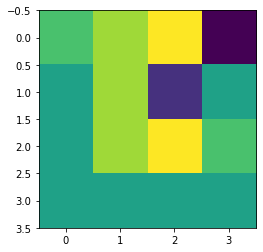

In [8]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1, plt.imshow(image1[0][0])

Max pooling simply takes the maximum value in each region. Consider the following image. For the first region, max pooling simply takes the largest element in a yellow region.   


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3maxpool_1.png" width = 500, align = "center">


The region shifts, and the process is repeated. The process is similar to convolution and is demonstrated in the following figure:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3_max_pool_animation.gif" width = 500, align = "center">


Create a maxpooling object in 2d as follows and perform max pooling as follows:  


(tensor([[[[2., 3., 3.],
           [2., 3., 3.],
           [2., 3., 3.]]]]),
 <matplotlib.image.AxesImage at 0x7fbc95b673d0>)

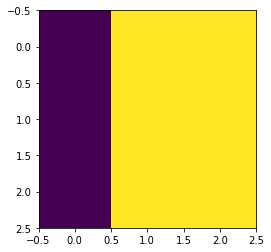

In [30]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1), plt.imshow(max1(image1)[0][0])

If the stride is set to None (its defaults setting), the process will simply take the maximum in a prescribed area and shift over accordingly as shown in the following figure:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3_max_pool_animation_2.gif" width = 500, align = "center">


Here's the code in Pytorch:  


In [16]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])